In [89]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

In [95]:
driver = webdriver.Chrome()

page_url = "https://gameofthrones.fandom.com/wiki/Category:Seasons_of_Game_of_Thrones"
driver.get(page_url)
 
time.sleep(3)

driver.find_element(By.XPATH, '//*[@class="_2O--J403t2VqCuF8XJAZLK"]').click()

In [96]:
# Get list of all seasons
seasons_list = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [97]:
# create dictionary
seasons = []
for season in seasons_list:
    season_url = season.get_attribute('href')
    season_name = season.text
    seasons.append({'name': season_name, 'url': season_url})
print(seasons)

[{'name': 'Game of Thrones: Season 1', 'url': 'https://gameofthrones.fandom.com/wiki/Game_of_Thrones:_Season_1'}, {'name': 'Category:Game of Thrones: Season 1', 'url': 'https://gameofthrones.fandom.com/wiki/Category:Game_of_Thrones:_Season_1'}, {'name': 'Game of Thrones: Season 2', 'url': 'https://gameofthrones.fandom.com/wiki/Game_of_Thrones:_Season_2'}, {'name': 'Category:Game of Thrones: Season 2', 'url': 'https://gameofthrones.fandom.com/wiki/Category:Game_of_Thrones:_Season_2'}, {'name': 'Game of Thrones: Season 3', 'url': 'https://gameofthrones.fandom.com/wiki/Game_of_Thrones:_Season_3'}, {'name': 'Category:Game of Thrones: Season 3', 'url': 'https://gameofthrones.fandom.com/wiki/Category:Game_of_Thrones:_Season_3'}, {'name': 'Game of Thrones: Season 4', 'url': 'https://gameofthrones.fandom.com/wiki/Game_of_Thrones:_Season_4'}, {'name': 'Category:Game of Thrones: Season 4', 'url': 'https://gameofthrones.fandom.com/wiki/Category:Game_of_Thrones:_Season_4'}, {'name': 'Game of Thron

In [98]:
seasons = [item for item in seasons if 'Category' in item['name']]

In [101]:
appearances_list = []
for season in seasons:
    driver.get(season['url'])
    elements = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')
    if len(elements) > 1:
        appearances_list.append({'name': elements[1].text, 'url': elements[1].get_attribute('href')})

print(appearances_list)


[{'name': 'Category:Appearances in Game of Thrones: Season 1', 'url': 'https://gameofthrones.fandom.com/wiki/Category:Appearances_in_Game_of_Thrones:_Season_1'}, {'name': 'Category:Appearances in Game of Thrones: Season 2', 'url': 'https://gameofthrones.fandom.com/wiki/Category:Appearances_in_Game_of_Thrones:_Season_2'}, {'name': 'Category:Appearances in Game of Thrones: Season 3', 'url': 'https://gameofthrones.fandom.com/wiki/Category:Appearances_in_Game_of_Thrones:_Season_3'}, {'name': 'Category:Appearances in Game of Thrones: Season 4', 'url': 'https://gameofthrones.fandom.com/wiki/Category:Appearances_in_Game_of_Thrones:_Season_4'}, {'name': 'Category:Appearances in Game of Thrones: Season 5', 'url': 'https://gameofthrones.fandom.com/wiki/Category:Appearances_in_Game_of_Thrones:_Season_5'}, {'name': 'Category:Appearances in Game of Thrones: Season 6', 'url': 'https://gameofthrones.fandom.com/wiki/Category:Appearances_in_Game_of_Thrones:_Season_6'}, {'name': 'Category:Appearances in

In [102]:
character_urls = []
for episode in appearances_list:
    driver.get(episode['url'])
    elems = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')
    for e in elems:
        character_urls.append({'name': episode['name'].split()[-1], 'url': e.get_attribute('href')})
print(character_urls)

[{'name': '1', 'url': 'https://gameofthrones.fandom.com/wiki/Winter_Is_Coming/Appearances'}, {'name': '1', 'url': 'https://gameofthrones.fandom.com/wiki/The_Kingsroad/Appearances'}, {'name': '1', 'url': 'https://gameofthrones.fandom.com/wiki/Lord_Snow/Appearances'}, {'name': '1', 'url': 'https://gameofthrones.fandom.com/wiki/Cripples,_Bastards,_and_Broken_Things/Appearances'}, {'name': '1', 'url': 'https://gameofthrones.fandom.com/wiki/The_Wolf_and_the_Lion/Appearances'}, {'name': '1', 'url': 'https://gameofthrones.fandom.com/wiki/A_Golden_Crown/Appearances'}, {'name': '1', 'url': 'https://gameofthrones.fandom.com/wiki/You_Win_or_You_Die/Appearances'}, {'name': '1', 'url': 'https://gameofthrones.fandom.com/wiki/The_Pointy_End/Appearances'}, {'name': '1', 'url': 'https://gameofthrones.fandom.com/wiki/Baelor/Appearances'}, {'name': '1', 'url': 'https://gameofthrones.fandom.com/wiki/Fire_and_Blood/Appearances'}, {'name': '2', 'url': 'https://gameofthrones.fandom.com/wiki/The_North_Remembe

In [104]:
names = []
for character in character_urls:
    driver.get(character['url'])
    ul_elem = driver.find_element(By.XPATH, '//*[@id="mw-content-text"]/div/ul[1]')
    print(ul_elem)
    li_elems = ul_elem.find_elements(By.TAG_NAME, 'li')
    for li_elem in li_elems:
        a = li_elem.find_elements(By.TAG_NAME, 'a')
        if a:
            names.append({'name': a[0].text, 'season': character['name']}) 
print(names)

<selenium.webdriver.remote.webelement.WebElement (session="a99c8333167b386b21a8307da6b2b027", element="0639D284C4C0BE99316BAE1EABEF2019_element_1184")>
<selenium.webdriver.remote.webelement.WebElement (session="a99c8333167b386b21a8307da6b2b027", element="FB6D002D6676A314420F2664BBA09B22_element_1293")>
<selenium.webdriver.remote.webelement.WebElement (session="a99c8333167b386b21a8307da6b2b027", element="74B45B16659B64899937AD012D61A55A_element_1370")>
<selenium.webdriver.remote.webelement.WebElement (session="a99c8333167b386b21a8307da6b2b027", element="ED3AABEE229F6D1105C1DD508125B12E_element_1472")>
<selenium.webdriver.remote.webelement.WebElement (session="a99c8333167b386b21a8307da6b2b027", element="03FB12D22BD5D51FED882D5275C04027_element_1593")>
<selenium.webdriver.remote.webelement.WebElement (session="a99c8333167b386b21a8307da6b2b027", element="E65734847F09747C60E5E47B76D304B0_element_1704")>
<selenium.webdriver.remote.webelement.WebElement (session="a99c8333167b386b21a8307da6b2b

<Axes: xlabel='season'>

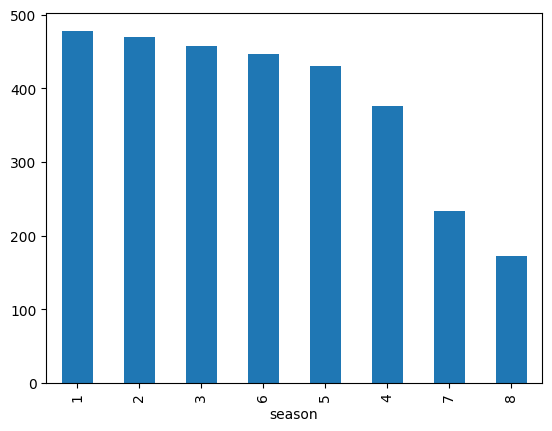

In [105]:
import matplotlib as plt

characters_df = pd.DataFrame(names)
characters_df['season'].value_counts().plot(kind='bar')

In [106]:
characters_df.to_csv('./data/characters.csv', index=False)